<a href="https://colab.research.google.com/github/kurihara-ryo/cesarean-pasaran/blob/main/%E3%80%90%E8%A7%A3%E7%AD%94%E4%BE%8B%E3%80%91%E7%99%BA%E5%B1%95%E8%AA%B2%E9%A1%8C_%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E2%85%A2_0506.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 各課題について、コメントを参考にしてプログラムを書いてください。
# 実行ボタンを押して、プログラムが正しく実行されることを確認してください。
# 提出の際は、コメントを削除せずに残してください。
# 全ての課題を解けなかった場合でも、〆切までに提出すれば途中点が付与されます。

課題1

K-meansクラスタリングのクラスタ数を選択するための方法として、「人工知能・機械学習入門」第13回においてエルボー法を紹介しました。エルボー法では、クラスタ数を小さい値から大きい値まで変化させ、各クラスタ数についてK-meansクラスタリングを行い、クラスタリング後の目的関数の値（inertia）を記録します。そして、クラスタ数の増加に対してinertiaの低下が緩やかになり始めたときのクラスタ数を最適なクラスタ数として選択します。

演習課題で扱った日本の気温データのクラスタリング問題について、以下の手順に沿ってエルボー法を行い、クラスタ数を選択してください。

1.   `for`を回してクラスタ数を小さい値から大きい値まで変化させ、各クラスタ数についてK-meansクラスタリングを行い、inertiaの値をリストに格納してください。クラスタ数の範囲は`range(2, 10)`とします。inertiaの値はクラスタリング結果のオブジェクトのメンバ変数`inertia_`から参照できます。
2.   横軸をクラスタ数、縦軸をinertiaとする折れ線グラフを表示してください。inertiaの低下が緩やかになったのは、クラスタ数いくつのときでしょうか。
3.   2.の観察結果にもとづいてクラスタ数を選択し、コメントの解答欄に書いてください。なお「低下が緩やかになった」の判断には、ある程度の主観が入るため、選択するクラスタ数は人によって異なるかもしれません。

Downloading...
From: https://drive.google.com/uc?export=download&id=1WsveWEwULst41FLQmcgfBGQsejWf6COG
To: /content/japan_temperature.csv
100%|██████████| 52.8k/52.8k [00:00<00:00, 48.4MB/s]


Text(0, 0.5, 'Inertia')

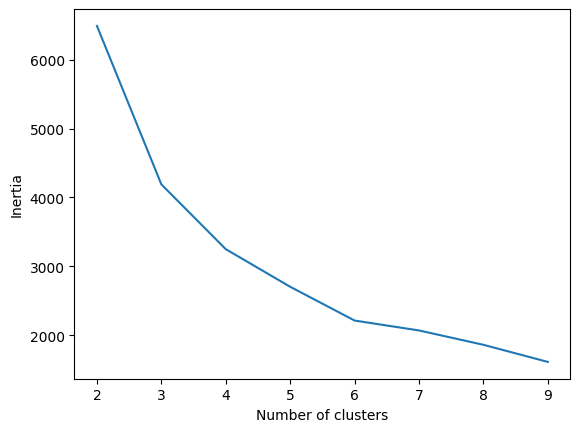

In [ ]:
import numpy as np
import pandas as pd
import gdown

# 日本の気温データ
url='https://drive.google.com/uc?export=download&id=1WsveWEwULst41FLQmcgfBGQsejWf6COG'
gdown.download(url, 'japan_temperature.csv', quiet=False)
df = pd.read_csv('japan_temperature.csv')

# 気温情報の切り出し、転置
df_part = df.iloc[:, 3:]
df_part = df_part.T

# 必要なモジュール一式を用意
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 乱数シードには以下の値を用いてください
seed = 1010

# ここからコードを書いてください

# データの前処理
scaler = StandardScaler()
X = scaler.fit_transform(df_part)

# 各クラスタ数についてK-meansクラスタリングを行い、
# inertiaの値をリストに格納
inertia_list = []
for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=seed)
    kmeans_result = model.fit(X)
    inertia_list.append(kmeans_result.inertia_)

# 折れ線グラフを表示
plt.plot(range(2, 10), inertia_list)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# 解答欄：inertiaの低下が緩やかになり始めたときのクラスタ数は？
# 3〜6ぐらいの数を選んであればいい

課題2

凝集型クラスタリングの特長の1つに、ベクトル以外のデータに対してクラスタリングを行えることが挙げられます。例えば、文字列データに対して、ハミング距離を距離指標にしてクラスタリングを行うことができます。

```
# おさらい：
# ハミング距離は、同じ長さの2つの文字列に対して、文字の異なっている位置が何ヶ所あるかを数えたものです。
# 例えば、下記の2つの文字列s,tは「*」マークを付けた3ヶ所が異なるため、ハミング距離は3となります。
# s: 1001011010
# t: 1000001110
#       * * *
```

人工プロモータのデータpromoter_activity.csvに記載されたDNA配列について、以下の手順に沿って凝集型クラスタリングを行ってください。

1.   2つの文字列を引数として、ハミング距離を戻り値とする関数`hm_dist()`を書いてください。「プログラミングⅡ」第3,4回の発展課題からコピペしても構いません。
2.   ハミング距離を距離指標として、距離行列を計算してください。距離行列はshapeが(配列数, 配列数)の2次元アレイであり、行列のi,j成分はcsv内のi番目の配列とj番目の配列のハミング距離とします。
3.   2.で計算した距離行列を用いて、平均連結法による凝集型クラスタリングを行ってください。クラスタ数は10に設定して、各配列のクラスタ割り当てを表示してください。



In [ ]:
# データの確認
# このセルは実行するだけ
import gdown
import pandas as pd
import numpy as np

url='https://drive.google.com/uc?export=download&id=1OjDryc69PuhvsjK5B2wtmxwHSchU-dXN'
gdown.download(url, 'promoter_activity.csv', quiet=False)
df = pd.read_csv('promoter_activity.csv')
display(df)

Downloading...
From: https://drive.google.com/uc?export=download&id=1OjDryc69PuhvsjK5B2wtmxwHSchU-dXN
To: /content/promoter_activity.csv
100%|██████████| 86.9k/86.9k [00:00<00:00, 64.7MB/s]


,promoter_sequence,transcription_activity
0,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTACCGCT...,-2.297722
1,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTCTCCTGT...,-1.788633
2,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTGGGCTTT...,-2.241245
3,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTGGAGCCT...,-1.950505
4,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTACACTCT...,-3.435533
...,...,...
995,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTTATGCT...,-3.379485
996,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATG...,-4.022645
997,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTACTTAT...,-2.723506
998,TTTTCTATCTACGTACATTGGTCTATTTCCTATTTCTCTTATAATT...,-2.070849


In [ ]:
# ここから課題

# ヒント：
# 距離行列を入力として凝集型クラスタリングを行うには、
# AgglomerativeClustering()の引数にmetric='precomputed'を指定して、
# fit()の引数に距離行列を渡せばいい。
#
# コード例：
# インスタンスを作成するときにmetric='precomputed'を指定
# model = AgglomerativeClustering(..., metric='precomputed')
# クラスタリングを実行するときに距離行列Dを渡す
# agglo_result = model.fit(D)

from sklearn.cluster import AgglomerativeClustering

# ハミング距離の関数
def hm_dist(s, t):
    d = 0
    for i in range(len(s)):
        if s[i] != t[i]:
            d += 1
    return d

# 距離行列の計算
D = np.zeros([df.shape[0], df.shape[0]])
for i in range(df.shape[0]):
    # 対称行列なので上三角部分だけ計算して残りはコピーしてもいい
    # D[i, i]は0なのでi+1から開始してOK
    for j in range(i+1, df.shape[0]):
        D[i, j] = hm_dist(df['promoter_sequence'][i], df['promoter_sequence'][j])
        D[j, i] = D[i, j]

# 凝集型クラスタリングのインスタンスを作成
# クラスタ数10
# 平均連結法
model = AgglomerativeClustering(n_clusters=10, linkage='average', metric='precomputed')

# 凝集型クラスタリングを実行
# 距離行列を渡す
agglo_result = model.fit(D)

print('クラスタの割り当て')
print(agglo_result.labels_)

クラスタの割り当て
[8 8 8 8 8 8 2 8 4 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 2 8 8 8 8 8 8 8 0 8 0 8 8
 8 0 2 8 8 8 2 8 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 6 8 8 8 8
 8 4 8 8 8 4 8 8 8 8 8 0 8 8 8 6 8 2 8 1 8 8 8 8 0 8 4 1 8 8 8 8 8 8 6 2 6
 8 8 8 8 8 1 8 4 6 8 8 8 8 8 8 8 2 8 8 8 8 4 8 8 8 8 8 1 8 8 2 8 8 8 8 8 0
 8 8 8 8 8 4 8 8 8 0 0 8 8 8 8 0 8 1 6 0 1 8 8 8 6 8 8 8 8 8 4 8 8 8 8 8 6
 8 8 8 8 8 8 8 8 8 8 1 8 8 8 4 8 8 8 8 8 8 4 8 8 1 1 1 8 8 2 8 8 4 8 2 8 8
 6 8 8 8 8 8 8 0 8 8 8 8 8 8 8 8 2 1 2 8 8 0 8 8 8 8 8 8 8 0 8 6 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 1 8 8 2 7 8 8 0 8 8 8 2 1 8 8 8 5 8 8 8 8 8 8 8 8 8 8 8
 8 8 0 1 8 8 8 8 8 8 8 8 8 8 8 8 2 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 4 8 8 1 8
 8 8 8 8 8 8 1 8 0 4 8 0 8 8 8 8 8 8 0 8 8 2 8 1 0 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 1 8 8 8 8 8 8 8 8 8 8 4 8 8 8 8 0 8 8 8 8 8 8 8 8 8 2 8 8
 8 8 8 4 8 8 8 8 1 8 8 8 8 8 8 8 8 8 8 8 8 2 6 0 8 2 8 8 8 0 8 8 8 8 8 8 8
 8 8 8 0 8 4 8 8 8 8 8 8 8 0 8 8 8 0 2 8 8 8 8 1 8 8 8 8 8 8 2 8 4 8 8 1 1
 6 8 8 8 8 8 4 

課題3

課題2で同定した各クラスタについて、転写活性の平均値を計算して表示してください。



In [ ]:
# 考え方の例
# 課題2で求めた各配列のクラスタ割り当てをデータフレームの新しい列として追加する。
# あとはquery()で各クラスタを抜き出して、
# 'transcription_activity'の列の平均を計算すればいい。

df['cluster'] = agglo_result.labels_

print('クラスタ番号\t転写活性の平均値')
for i in range(agglo_result.n_clusters_):
    df_part = df.query('cluster == {}'.format(i))
    mean_activity = np.mean(df_part['transcription_activity'])
    print('{}\t{}'.format(i, mean_activity))

クラスタ番号	転写活性の平均値
0	-2.6134151512500003
1	-2.507872519547619
2	-2.4144302808867923
3	-2.4157727458333333
4	-2.3631484789756096
5	-2.9667799916666664
6	-2.4081585522499998
7	-2.537580253
8	-2.3233945916573604
9	-4.321330548


In [ ]:
# 別の解法
for i in range(agglo_result.n_clusters_):
    mean_activity = df['transcription_activity'][agglo_result.labels_ == i].mean()
    print('{}\t{}'.format(i, mean_activity))

0	-2.6134151512500003
1	-2.507872519547619
2	-2.4144302808867923
3	-2.4157727458333333
4	-2.3631484789756096
5	-2.9667799916666664
6	-2.4081585522499998
7	-2.537580253
8	-2.3233945916573604
9	-4.321330548


In [ ]:
# 解説
# アレイに対して「==」のような条件判定の演算子を使うと、
# 要素ごとに条件判定を行ってbool型のアレイを返します。

# aの各要素が2に等しいか判定
# bはbool型のアレイ
# aが2に等しいインデックスにはTrue、
# aが2に等しくないインデックスにはFalseが入る
a = np.array([2, 3, 2, 2, 9, 5, 8, 0])
b = (a == 2)
print('a: {}'.format(a))
print('b: {}'.format(b))

# このbool型のアレイを使って、
# 他のアレイから条件を満たす部分のみを取り出すことができます。
c = np.array([5.3, 2.4, 9.0, 0.7, 1.1, 3.2, 7.5, 4.1])
# アレイcから、bがTrueになっている部分のみを取り出す
print('c: {}'.format(c))
print('c[b]: {}'.format(c[b]))
# 取り出した部分の平均を計算
print('mean of c[b]: {}'.format(c[b].mean()))

# 上記の別解では、この方法を応用しています

a: [2 3 2 2 9 5 8 0]
b: [ True False  True  True False False False False]
c: [5.3 2.4 9.  0.7 1.1 3.2 7.5 4.1]
c[b]: [5.3 9.  0.7]
mean of c[b]: 5.0
